<a href="https://colab.research.google.com/github/PaletteofDesign/recreate-interest-vs-principal-graph/blob/main/recreate_interest_vs_principal_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
f_name = '/content/mortgages.csv'
df = pd.read_csv(f_name)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [4]:
years_30 = df['Mortgage Name']=='30 Year'
len(years_30)

1080

In [5]:
rate_3_percent = df['Interest Rate']==0.03

In [6]:
mort_30_05 = df.loc[years_30 & ~rate_3_percent,:]
mort_30_03 = df.loc[years_30 & rate_3_percent,:]

In [7]:
mort_30_03['Interest Paid'].cumsum()

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

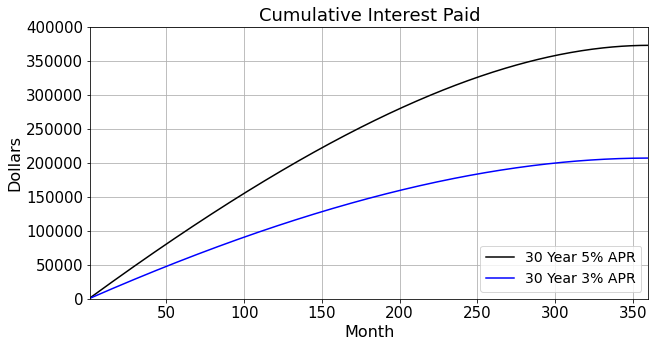

In [18]:
plt.figure(figsize=(10,5))
plt.plot(mort_30_05['Month'], mort_30_05['Interest Paid'].cumsum(), c='k', label='30 Year 5% APR');
plt.plot(mort_30_03['Month'], mort_30_03['Interest Paid'].cumsum(), c='b', label='30 Year 3% APR');
plt.grid()
plt.title('Cumulative Interest Paid', fontsize=18)
plt.ylim([0,400000])
plt.xlim([1, 360])
plt.ylabel('Dollars', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc='lower right', fontsize=14);